In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# Upload the dataset
uploaded = files.upload()

# Load the dataset with appropriate encoding
file_path = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_path, encoding='euc-kr')  # Adjust encoding if necessary
data.head()

Saving Dataset.csv to Dataset.csv


,구분,인구수(계),인구수(남),인구수(여),세대수,18세이상 인구수(계),18세이상 인구수(남),18세이상 인구수(여),65세이상 인구수(계),65세이상 인구수(남),65세이상 인구수(여),통(리)수,반수,면적(제곱킬로미터),통(리)평균-반수,통(리)평균-세대수,반평균-세대수
0,구포1동,15087,7558,7529,7970,13761,6891,6870,3919,1801,2118,24,109,1.15,5,336,74
1,구포2동,23196,11840,11356,11414,21059,10723,10336,5670,2670,3000,34,170,2.91,5,339,68
2,구포3동,17605,9007,8598,8845,16222,8287,7935,4484,2071,2413,30,136,1.47,5,300,66
3,금곡동,34777,16730,18047,17602,31442,15021,16421,10164,4328,5836,38,219,8.12,6,467,81
4,화명1동,39190,19113,20077,14234,32777,15849,16928,5941,2907,3034,27,140,4.73,5,531,102


In [2]:
# Check basic information
data.info()

# Summary statistics
data.describe()

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values
data.fillna(method='ffill', inplace=True)  # Forward fill as an example

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   구분             13 non-null     object 
 1   인구수(계)         13 non-null     int64  
 2   인구수(남)         13 non-null     int64  
 3   인구수(여)         13 non-null     int64  
 4   세대수            13 non-null     int64  
 5   18세이상 인구수(계)   13 non-null     int64  
 6   18세이상 인구수(남)   13 non-null     int64  
 7   18세이상 인구수(여)   13 non-null     int64  
 8   65세이상 인구수(계)   13 non-null     int64  
 9   65세이상 인구수(남)   13 non-null     int64  
 10  65세이상 인구수(여)   13 non-null     int64  
 11  통(리)수          13 non-null     int64  
 12  반수             13 non-null     int64  
 13  면적(제곱킬로미터)     13 non-null     float64
 14  통(리)평균-반수      13 non-null     int64  
 15  통(리)평균-세대수     13 non-null     int64  
 16  반평균-세대수        13 non-null     int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 1.9+ K

<ipython-input-2-14e80cea103c>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [17]:
data.rename(columns={
    '구분': 'Region',
    '인구수 (계)': 'Total_Population',
    '인구수 (남)': 'Male_Population',
    '인구수 (여)': 'Female_Population',
    '세대수': 'Households',
    '18세이상 인구수 (계)': 'Population_18Plus_Total',
    '18세이상 인구수 (남)': 'Population_18Plus_Male',
    '18세이상 인구수 (여)': 'Population_18Plus_Female',
    '65세이상 인구수 (계)': 'Population_65Plus_Total',
    '65세이상 인구수 (남)': 'Population_65Plus_Male',
    '65세이상 인구수 (여)': 'Population_65Plus_Female',
    '통 (리)수': 'Districts',
    '반수': 'Subdistricts',
    '면적 (제곱킬로미터)': 'Area_km2',
    '통 (리) 평균-반수': 'Avg_Subdistricts_per_District',
    '통 (리) 평균-세대수': 'Avg_Households_per_District',
    '반평균-세대수': 'Avg_Households_per_Subdistrict'
}, inplace=True)

In [72]:
data.head()

,Region,Total Population,Male Population,Female Population,Households,18+ Population (Total),18+ Population (Male),18+ Population (Female),65+ Population (Total),65+ Population (Male),...,통(리)수,Subdistricts,Area (sq km),통(리)평균-반수,통(리)평균-세대수,Avg_Households_per_Subdistrict,Male_Percentage,Female_Percentage,Population_65Plus_Percentage,Population_Density
0,구포1동,15087,7558,7529,7970,13761,6891,6870,3919,1801,...,24,109,1.15,5,336,74,50.096109,49.903891,25.976006,13119.130435
1,구포2동,23196,11840,11356,11414,21059,10723,10336,5670,2670,...,34,170,2.91,5,339,68,51.043283,48.956717,24.443870,7971.134021
2,구포3동,17605,9007,8598,8845,16222,8287,7935,4484,2071,...,30,136,1.47,5,300,66,51.161602,48.838398,25.470037,11976.190476
3,금곡동,34777,16730,18047,17602,31442,15021,16421,10164,4328,...,38,219,8.12,6,467,81,48.106507,51.893493,29.226213,4282.881773
4,화명1동,39190,19113,20077,14234,32777,15849,16928,5941,2907,...,27,140,4.73,5,531,102,48.770094,51.229906,15.159479,8285.412262


from matplotlib import pyplot as plt
_df_17['Total Population'].plot(kind='hist', bins=20, title='Total Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Male Population'].plot(kind='hist', bins=20, title='Male Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Female Population'].plot(kind='hist', bins=20, title='Female Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Households'].plot(kind='hist', bins=20, title='Households')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Total Population', y='Male Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Male Population', y='Female Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Female Population', y='Households', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Households', y='18+ Population (Total)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Total Population'].plot(kind='line', figsize=(8, 4), title='Total Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Male Population'].plot(kind='line', figsize=(8, 4), title='Male Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Female Population'].plot(kind='line', figsize=(8, 4), title='Female Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Households'].plot(kind='line', figsize=(8, 4), title='Households')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Total Population', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Male Population', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='Female Population', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='Households', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [19]:
data.describe()

,Total Population,Male Population,Female Population,Households,18+ Population (Total),18+ Population (Male),18+ Population (Female),65+ Population (Total),65+ Population (Male),65+ Population (Female),통(리)수,Subdistricts,Area (sq km),통(리)평균-반수,통(리)평균-세대수,Avg_Households_per_Subdistrict
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,20614.461538,10114.615385,10499.846154,9416.692308,18214.153846,8882.230769,9331.923077,4794.000000,2159.461538,2634.538462,23.000000,118.692308,3.028462,5.230769,419.923077,80.461538
std,9087.089941,4389.618255,4706.845438,3487.844257,7574.907809,3623.203052,3963.243315,1890.163353,831.594815,1072.721354,7.735201,41.578008,2.074764,0.599145,105.526822,15.240382
min,9729.000000,4727.000000,5002.000000,5373.000000,9017.000000,4364.000000,4653.000000,3092.000000,1271.000000,1821.000000,15.000000,75.000000,0.950000,4.000000,300.000000,65.000000
25%,15087.000000,7558.000000,7529.000000,7236.000000,13761.000000,6724.000000,6870.000000,3515.000000,1592.000000,1888.000000,17.000000,88.000000,1.470000,5.000000,339.000000,68.000000
50%,17227.000000,8270.000000,8649.000000,7970.000000,15443.000000,7349.000000,7935.000000,4484.000000,2071.000000,2413.000000,19.000000,100.000000,2.320000,5.000000,397.000000,77.000000
75%,26038.000000,12672.000000,13366.000000,11028.000000,22374.000000,10775.000000,11599.000000,5670.000000,2661.000000,3000.000000,28.000000,140.000000,4.730000,6.000000,487.000000,84.000000
max,39190.000000,19113.000000,20077.000000,17602.000000,32777.000000,15849.000000,16928.000000,10164.000000,4328.000000,5836.000000,38.000000,219.000000,8.120000,6.000000,670.000000,114.000000


from matplotlib import pyplot as plt
_df_34['Total Population'].plot(kind='hist', bins=20, title='Total Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Male Population'].plot(kind='hist', bins=20, title='Male Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Female Population'].plot(kind='hist', bins=20, title='Female Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Households'].plot(kind='hist', bins=20, title='Households')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Total Population', y='Male Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Male Population', y='Female Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='Female Population', y='Households', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='Households', y='18+ Population (Total)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Total Population'].plot(kind='line', figsize=(8, 4), title='Total Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['Male Population'].plot(kind='line', figsize=(8, 4), title='Male Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Female Population'].plot(kind='line', figsize=(8, 4), title='Female Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Households'].plot(kind='line', figsize=(8, 4), title='Households')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
print(data.columns)


Index(['Region', 'Total Population', 'Male Population', 'Female Population',
       'Households', '18+ Population (Total)', '18+ Population (Male)',
       '18+ Population (Female)', '65+ Population (Total)',
       '65+ Population (Male)', '65+ Population (Female)', '통(리)수',
       'Subdistricts', 'Area (sq km)', '통(리)평균-반수', '통(리)평균-세대수',
       'Avg_Households_per_Subdistrict'],
      dtype='object')


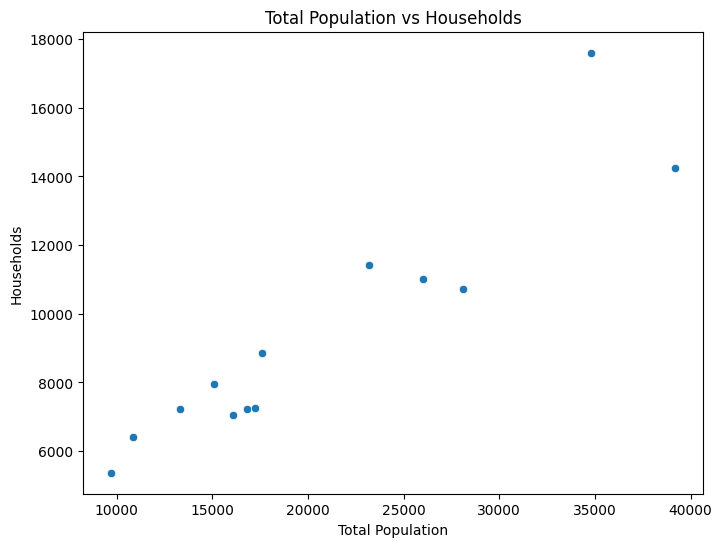

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Population', y='Households', data=data)
plt.title('Total Population vs Households')
plt.xlabel('Total Population')
plt.ylabel('Households')
plt.show()

In [32]:
!apt-get install -y fonts-nanum
!fc-cache -fv


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,332 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [33]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# Set Nanum Gothic as the default font
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()


In [52]:
plt.rcParams['font.family'] = 'DejaVu Sans'  # Use a default font

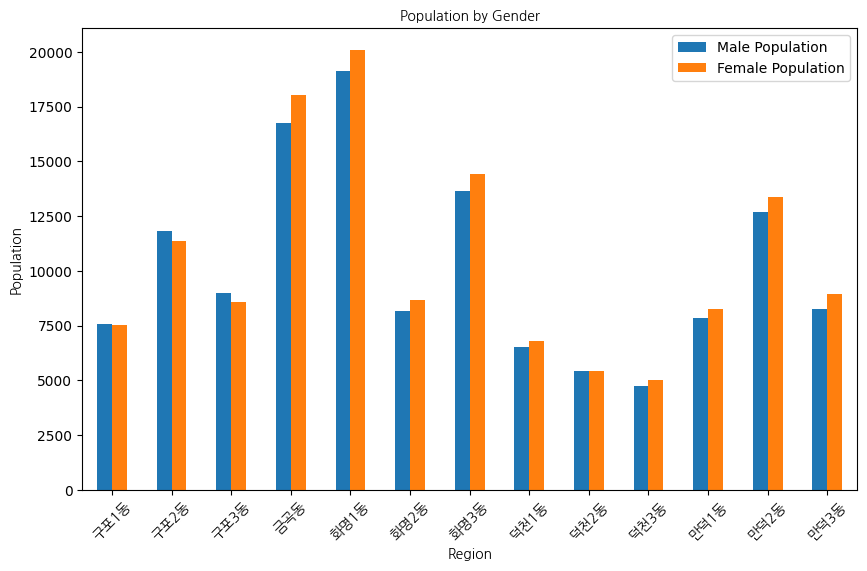

In [53]:
import logging
import warnings

# Suppress warnings from Matplotlib's font manager
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# Suppress all warnings globally (optional)
warnings.filterwarnings("ignore")

# Your plot code
data[['Male Population', 'Female Population']].plot(kind='bar', figsize=(10, 6))
plt.title('Population by Gender', fontproperties=font_prop)
plt.ylabel('Population', fontproperties=font_prop)
plt.xlabel('Region', fontproperties=font_prop)
plt.xticks(ticks=range(len(data)), labels=data['Region'], rotation=45, fontproperties=font_prop)
plt.show()


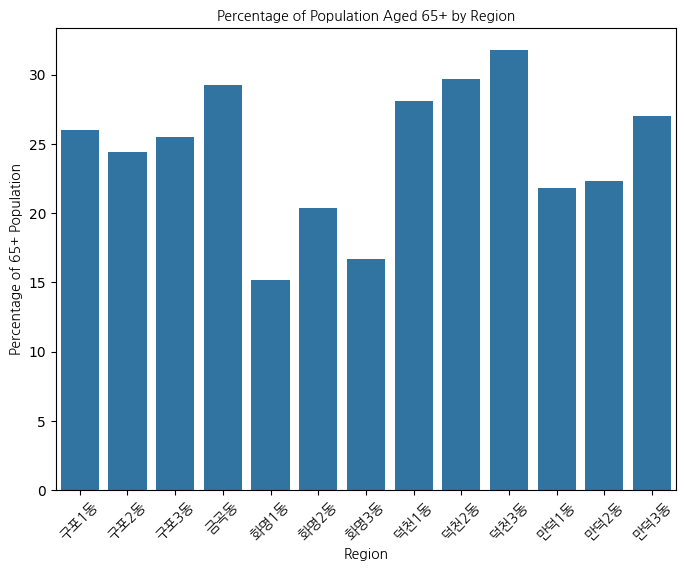

In [54]:
# Calculate the percentage of the 65+ population
data['Population_65Plus_Percentage'] = (data['65+ Population (Total)'] / data['Total Population']) * 100

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Population_65Plus_Percentage', data=data)

# Titles and labels with proper font
plt.title('Percentage of Population Aged 65+ by Region', fontproperties=font_prop)
plt.xlabel('Region', fontproperties=font_prop)
plt.ylabel('Percentage of 65+ Population', fontproperties=font_prop)

# Properly display region names with rotation and font
plt.xticks(rotation=45, fontproperties=font_prop)
plt.show()


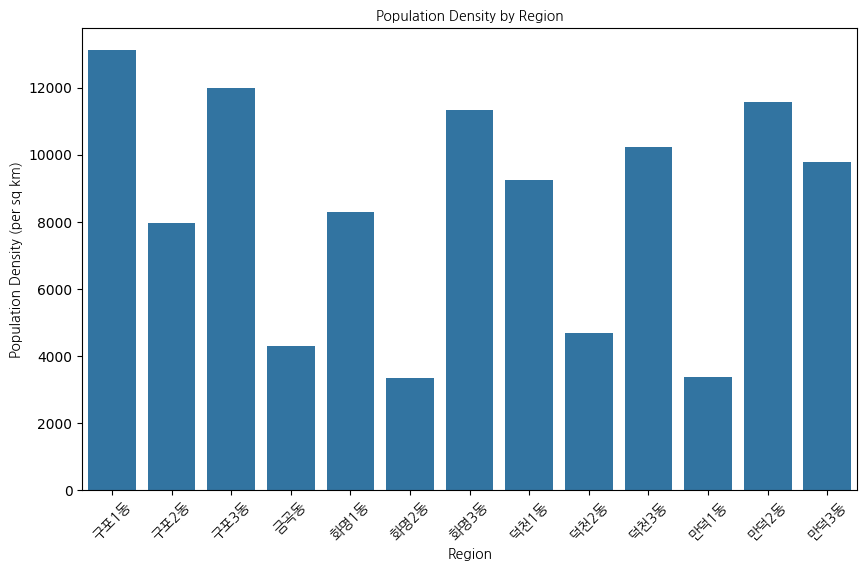

In [56]:
data['Population_Density'] = data['Total Population'] / data['Area (sq km)']

# Plot population density
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Population_Density', data=data)
plt.title('Population Density by Region', fontproperties=font_prop)
plt.xlabel('Region', fontproperties=font_prop)
plt.ylabel('Population Density (per sq km)', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.show()


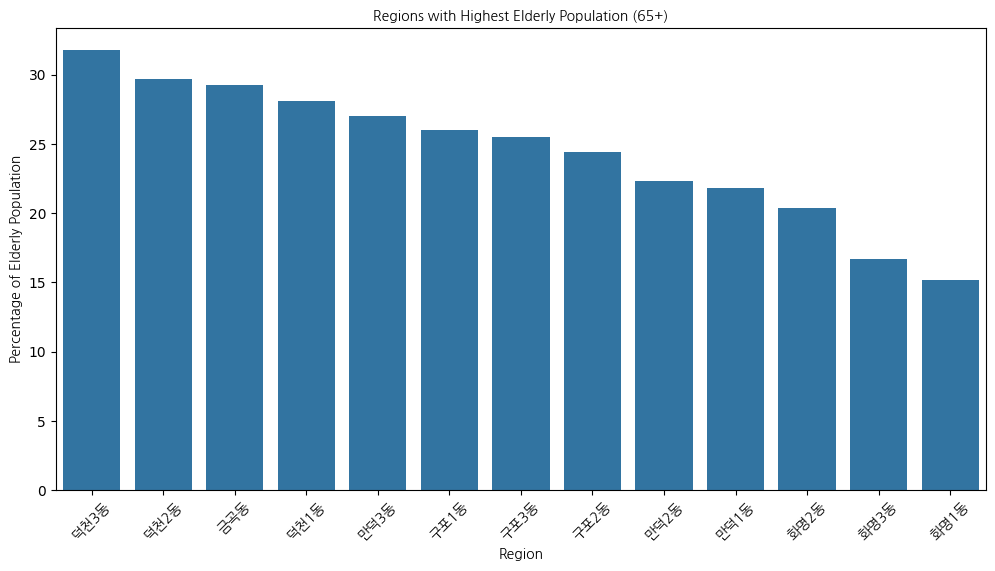

In [57]:
# Sort by elderly population percentage
data_sorted = data.sort_values(by='Population_65Plus_Percentage', ascending=False)

# Plot the top regions with the highest 65+ population percentage
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Population_65Plus_Percentage', data=data_sorted)
plt.title('Regions with Highest Elderly Population (65+)', fontproperties=font_prop)
plt.xlabel('Region', fontproperties=font_prop)
plt.ylabel('Percentage of Elderly Population', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.show()


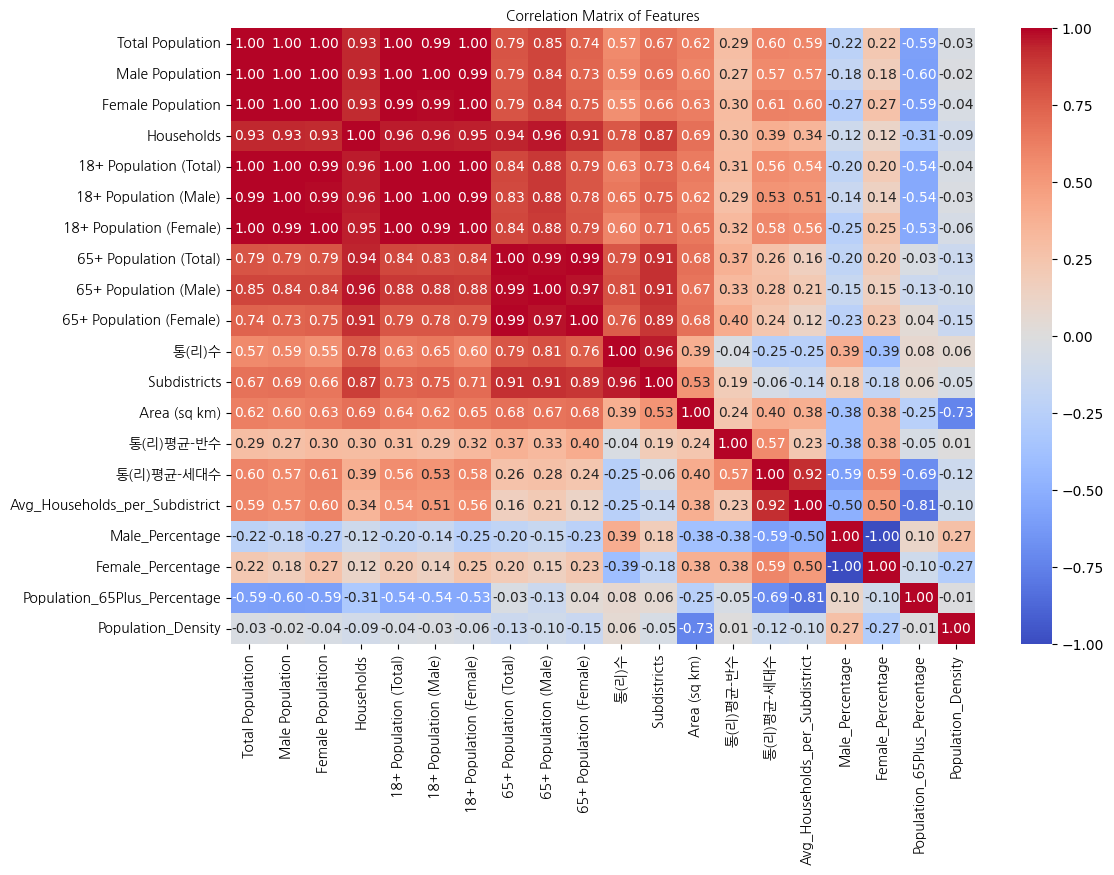

In [58]:
from matplotlib import font_manager as fm

# Set up the font
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Update to your system's path
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Re-plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()


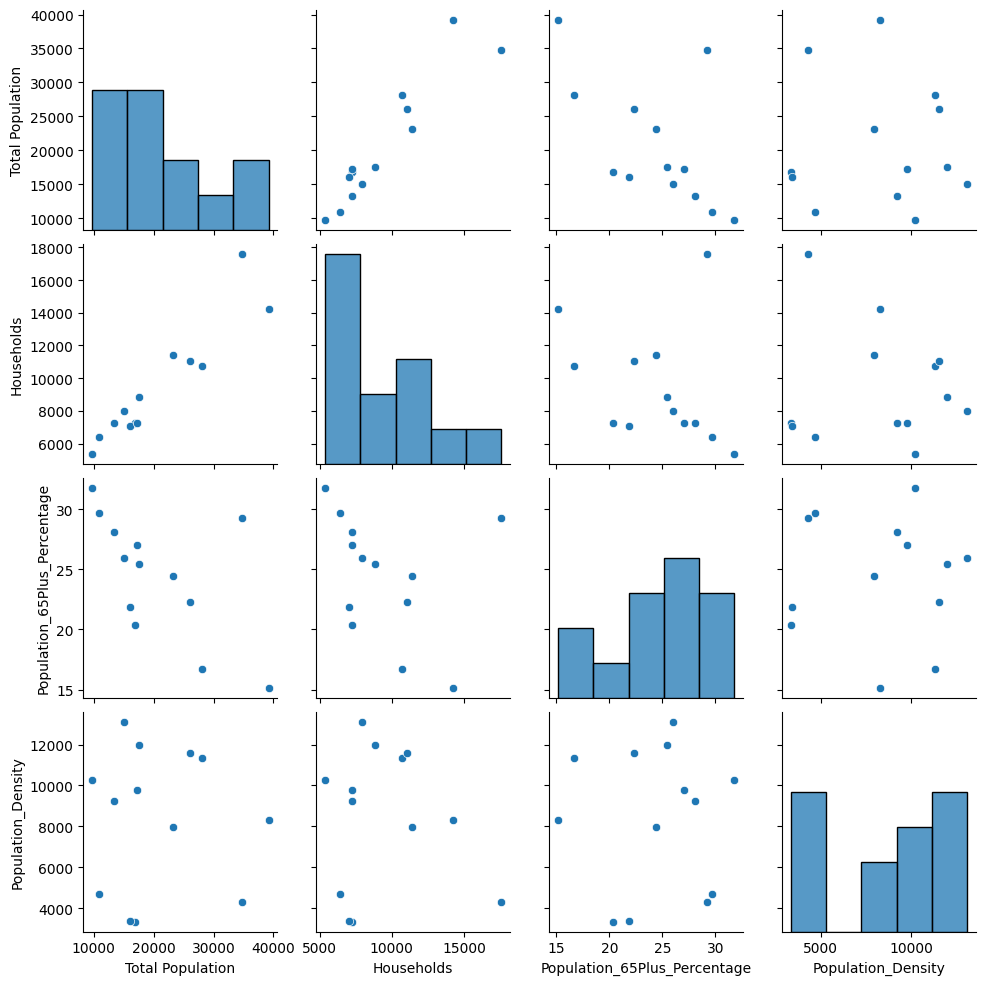

In [59]:
sns.pairplot(data, vars=['Total Population', 'Households', 'Population_65Plus_Percentage', 'Population_Density'])
plt.show()


In [60]:
from sklearn.linear_model import LinearRegression

# Define features (e.g., area and households) and target (population density)
X = data[['Area (sq km)', 'Households']]
y = data['Population_Density']

# Fit a regression model
model = LinearRegression()
model.fit(X, y)

# Display coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Area (sq km): -2094.77
Households: 0.76


In [61]:
print(f"Intercept: {model.intercept_:.2f}")


Intercept: 7553.47


In [62]:
r2_score = model.score(X, y)
print(f"R-squared: {r2_score:.2f}")

R-squared: 0.86


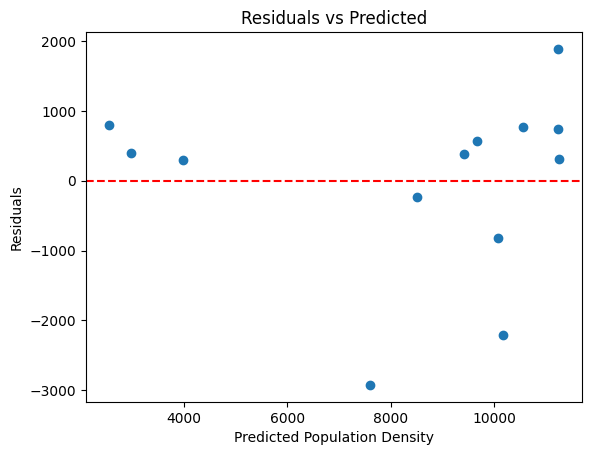

In [63]:
import matplotlib.pyplot as plt

y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Population Density')
plt.ylabel('Residuals')
plt.show()

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)

print("Coefficients with Polynomial Features:")
for feature, coef in zip(poly.get_feature_names_out(X.columns), model_poly.coef_):
    print(f"{feature}: {coef:.2f}")


Coefficients with Polynomial Features:
Area (sq km): -2235.29
Households: -0.87
Area (sq km)^2: 787.08
Area (sq km) Households: -0.65
Households^2: 0.00


In [65]:
# R-squared for the basic model
r2_linear = model.score(X, y)
print(f"Linear Model R-squared: {r2_linear:.2f}")

# R-squared for the polynomial model
r2_poly = model_poly.score(X_poly, y)
print(f"Polynomial Model R-squared: {r2_poly:.2f}")


Linear Model R-squared: 0.86
Polynomial Model R-squared: 0.93


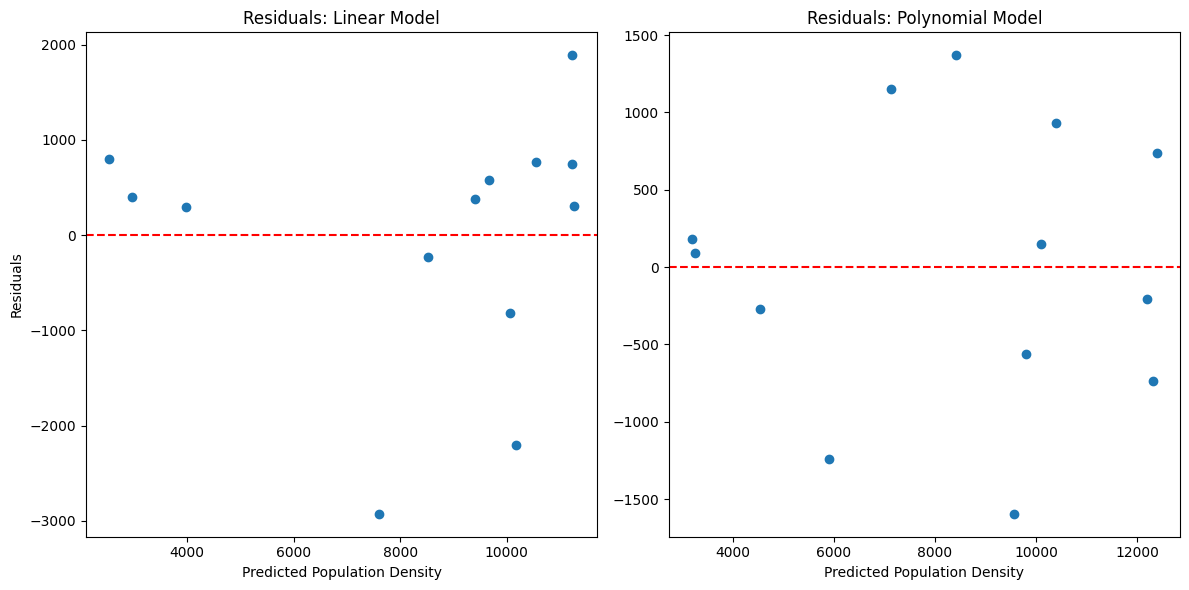

In [66]:
# Residuals for basic model
y_pred_linear = model.predict(X)
residuals_linear = y - y_pred_linear

# Residuals for polynomial model
y_pred_poly = model_poly.predict(X_poly)
residuals_poly = y - y_pred_poly

# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_linear, residuals_linear)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals: Linear Model')
plt.xlabel('Predicted Population Density')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals: Polynomial Model')
plt.xlabel('Predicted Population Density')

plt.tight_layout()
plt.show()


In [67]:
new_data = pd.DataFrame({
    'Area (sq km)': [50, 100, 200],
    'Households': [500, 1000, 2000]
})


In [68]:
# Linear model predictions
linear_preds = model.predict(new_data)

# Polynomial model predictions
new_data_poly = poly.transform(new_data)  # Transform data for polynomial features
poly_preds = model_poly.predict(new_data_poly)

# Combine predictions for comparison
new_data['Linear_Prediction'] = linear_preds
new_data['Polynomial_Prediction'] = poly_preds
print(new_data)

   Area (sq km)  Households  Linear_Prediction  Polynomial_Prediction
0            50         500      -96803.326495           1.852775e+06
1           100        1000     -201160.122837           7.595318e+06
2           200        2000     -409873.715522           3.078988e+07


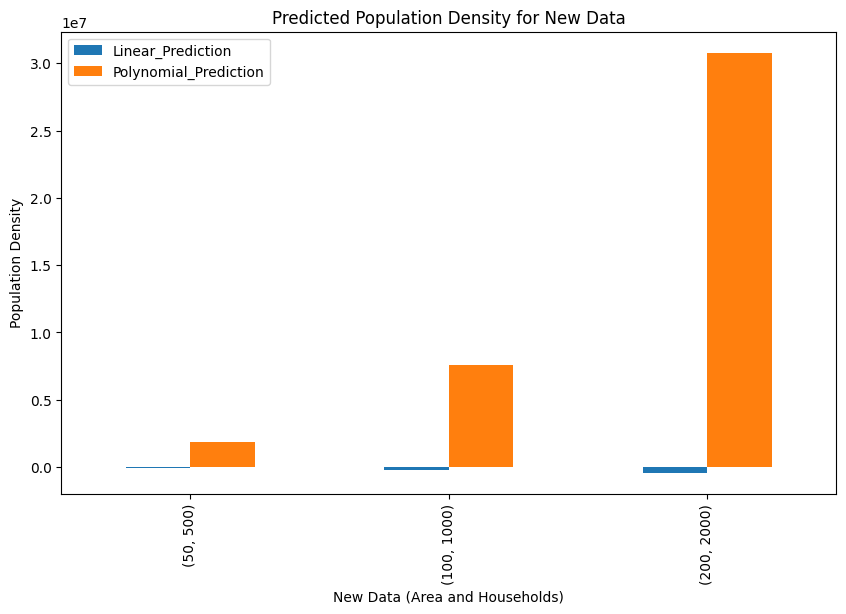

In [69]:
# Visualization of predictions
new_data.set_index(['Area (sq km)', 'Households'], inplace=True)
new_data[['Linear_Prediction', 'Polynomial_Prediction']].plot(kind='bar', figsize=(10, 6))
plt.title('Predicted Population Density for New Data')
plt.ylabel('Population Density')
plt.xlabel('New Data (Area and Households)')
plt.show()


In [71]:
from ipywidgets import interact

def show_plot(plot_type):
    """
    Display the specified plot type.

    Parameters:
    plot_type (str): The type of plot to display. Options are:
                     'Population by Gender', 'Population Density'.
    """
    if plot_type == "Population by Gender":
        data[['Male Population', 'Female Population']].plot(kind='bar', figsize=(10, 6))
        plt.title('Population by Gender', fontproperties=font_prop)
        plt.ylabel('Population', fontproperties=font_prop)
        plt.xlabel('Region', fontproperties=font_prop)
        plt.xticks(ticks=range(len(data)), labels=data['Region'], rotation=45, fontproperties=font_prop)
        plt.show()
    elif plot_type == "Population Density":
        sns.barplot(x='Region', y='Population_Density', data=data)
        plt.title('Population Density by Region', fontproperties=font_prop)
        plt.xlabel('Region', fontproperties=font_prop)
        plt.ylabel('Population Density', fontproperties=font_prop)
        plt.xticks(rotation=45, fontproperties=font_prop)
        plt.show()

interact(show_plot, plot_type=["Population by Gender", "Population Density"])


interactive(children=(Dropdown(description='plot_type', options=('Population by Gender', 'Population Density')…

<function __main__.show_plot(plot_type)>